<a href="https://colab.research.google.com/github/thiagocordero/data_science_alura/blob/main/curso_dataScience_explorando_e_analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1: Conhecendo os dados

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]
notas

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Através so value_counts(), podemos perceber que as pessoas tem uma tendência a dar notas inteiras e acima de 3.

In [ ]:
notas['nota'].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
# prompt: calcular a porcentagem de notas acima de 3

total_notas = len(notas)
notas_acima_de_3 = len(notas[notas['nota'] > 3])
porcentagem_notas_acima_de_3 = (notas_acima_de_3 / total_notas) * 100

print(f"A porcentagem de notas acima de 3 é: {porcentagem_notas_acima_de_3:.2f}%")

A porcentagem de notas acima de 3 é: 61.20%


In [ ]:
notas['nota'].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

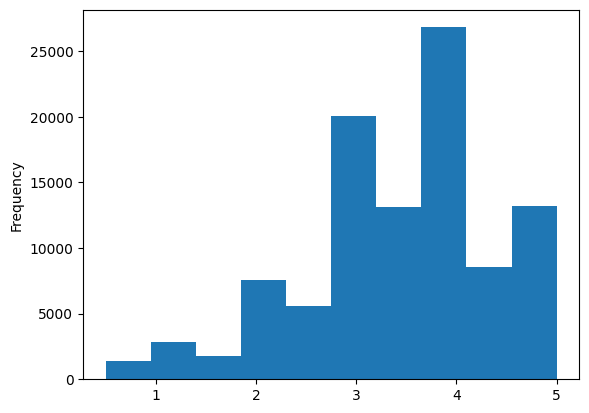

In [ ]:
# Visualização Histograma (distribuição)
notas['nota'].plot(kind='hist')

In [ ]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(mediana, media)

3.5 3.501556983616962


In [ ]:
notas['nota'].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

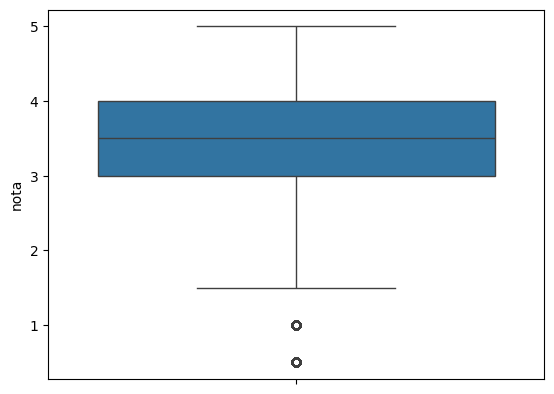

In [ ]:
# Visualização Boxplot
import seaborn as sns

sns.boxplot(notas['nota'])

# Aula 2: Analisando os dados

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/refs/heads/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeID", "titulo", "generos"]
filmes

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.query('filmeID==1')['nota'].mean()

3.9209302325581397

In [ ]:
# prompt: quero a media de todos os filmes por filme id

import pandas as pd

notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

media_por_filme = notas.groupby("filmeID")["nota"].mean()
media_por_filme

,nota
filmeID,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [ ]:
# Pegar as notas e agrupar por filmes
media_por_filme = notas.groupby("filmeID")["nota"].mean()
media_por_filme.head()

,nota
filmeID,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

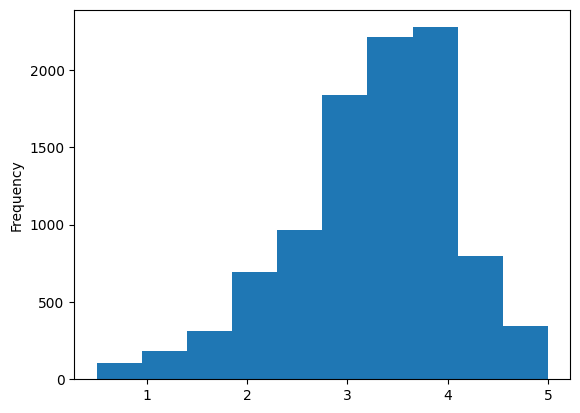

In [ ]:
media_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

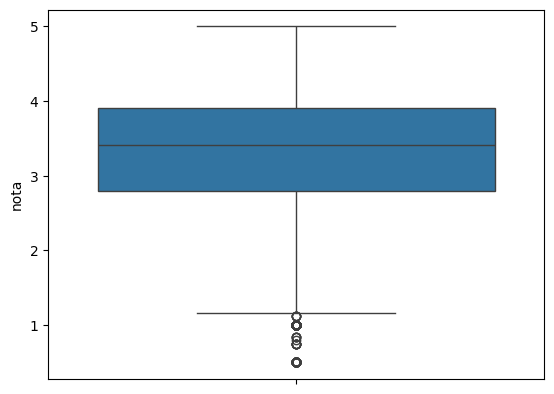

In [ ]:
sns.boxplot(media_por_filme)

In [ ]:
media_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribuição das médias dos filmes')

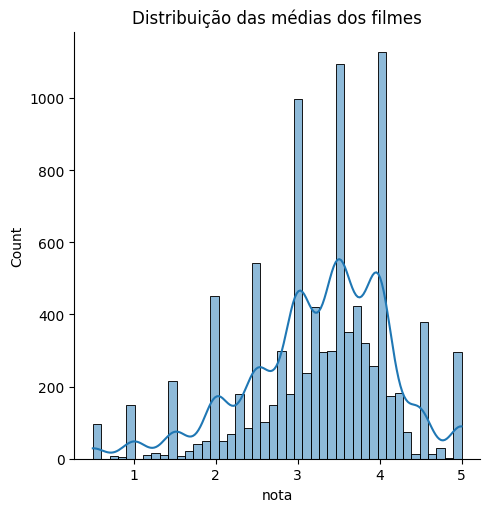

In [ ]:
# Fazer um gráfico de distribuicao com o seaBorn
sns.displot(media_por_filme, kde=True)
plt.title("Distribuição das médias dos filmes")

# Aula 3: Entendendo os tipos de variáveis

In [ ]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


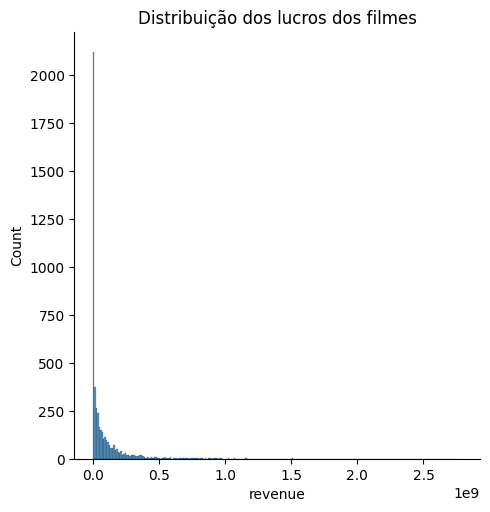

In [ ]:
# Visualizando os lucros dos filmes (revenue)

sns.displot(tmdb['revenue'])
plt.title("Distribuição dos lucros dos filmes")
plt.show()

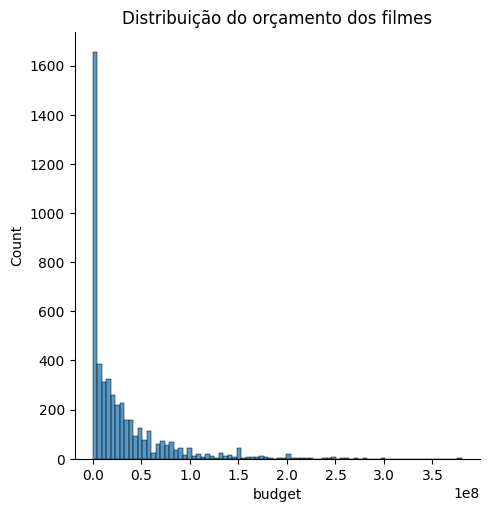

In [ ]:
# Visualizando a distribuição do orçamento dos filmes (budget)
sns.displot(tmdb['budget'])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [ ]:
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
#Ver os que o faturamento não está registrado
tmdb.query('revenue < 500')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


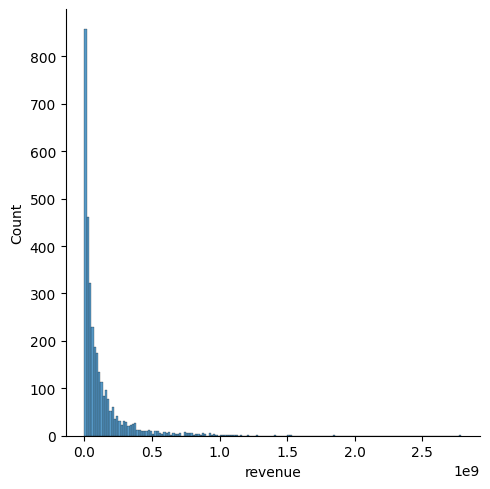

In [ ]:
com_faturamento = tmdb.query('revenue > 500')
sns.displot(com_faturamento['revenue'])

In [ ]:
tmdb['original_language'].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [ ]:
# budget => variável quantitativa contínua (é representada por um número e tem uma ordem)
# nota do movielens => categorica continua
# idioma => categorica sem ordem

# Aula 4: Visualizando os dados

In [ ]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language'>

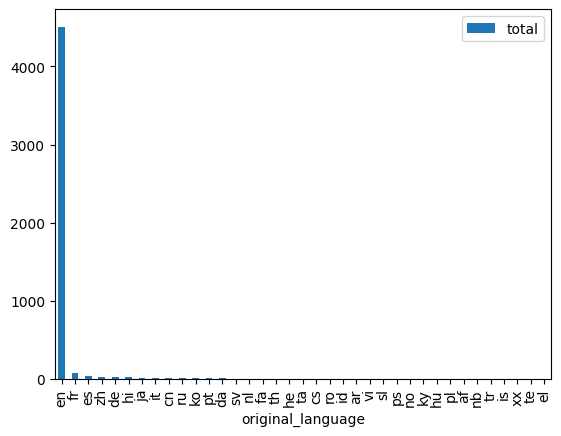

In [ ]:
contagem_de_lingua.plot(kind='bar', x='original_language', y='total')

<Axes: xlabel='original_language', ylabel='total'>

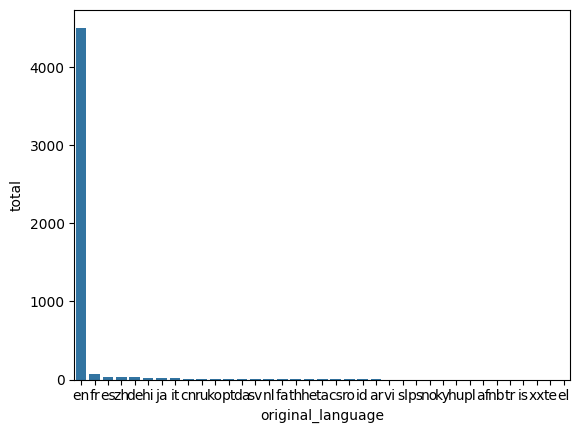

In [ ]:
sns.barplot(x='original_language', y='total', data=contagem_de_lingua)

<Axes: xlabel='original_language', ylabel='count'>

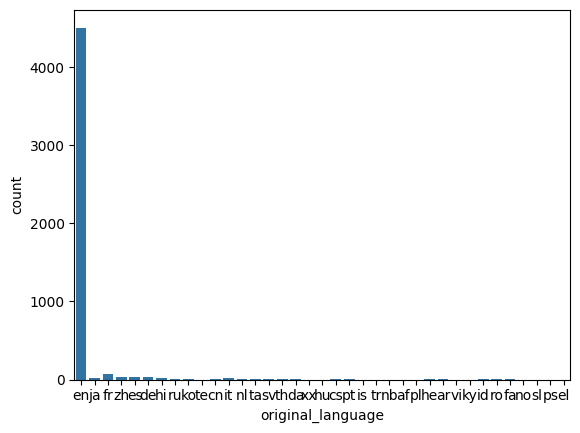

In [ ]:
sns.countplot(data=tmdb, x='original_language')

<Axes: ylabel='total'>

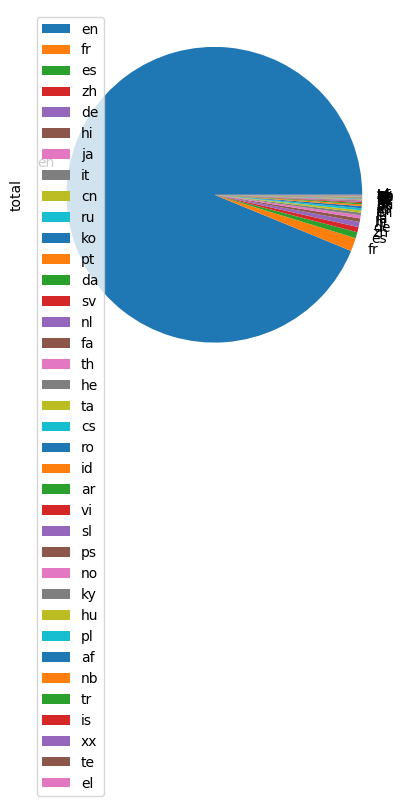

In [ ]:
# usando com pie (horrivel)
contagem_de_lingua.plot(kind='pie', y='total', labels=contagem_de_lingua["original_language"])

In [ ]:
#
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_ingles
print(total_geral, total_ingles, total_do_resto)

4803 4505 298


In [ ]:
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


from matplotlib import pyplot as plt
dados['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('lingua').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dados['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dados['lingua'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dados, x='total', y='lingua', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='lingua', ylabel='total'>

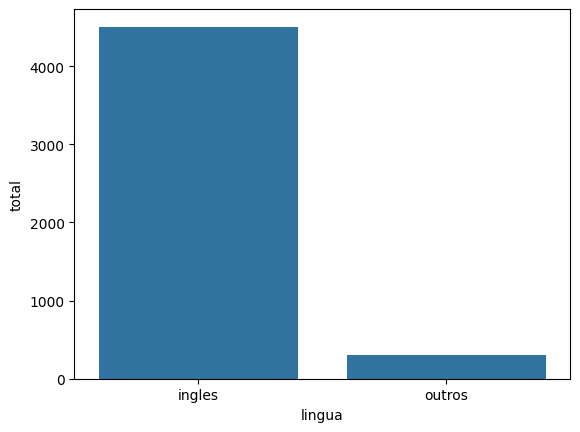

In [ ]:
sns.barplot(data=dados, x='lingua', y='total')

<Axes: ylabel='total'>

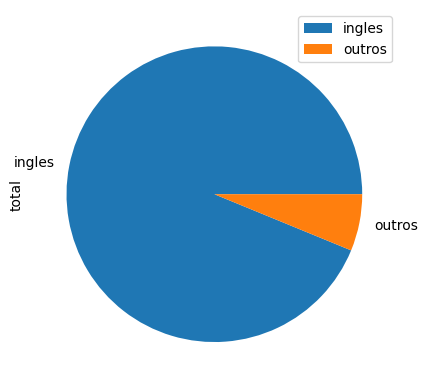

In [ ]:

dados.plot(kind='pie', y='total', labels=dados['lingua'])

In [ ]:
total_de_outras_linguas = tmdb.query('original_language != "en"')['original_language'].value_counts()


<Axes: xlabel='original_language', ylabel='count'>

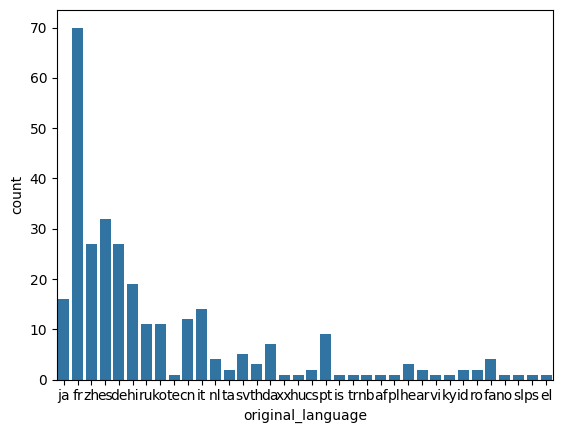

In [ ]:
sns.countplot(data=tmdb.query('original_language != "en"'), x='original_language')

# Aula 5 - Ajustando os visuais

<Axes: xlabel='original_language', ylabel='count'>

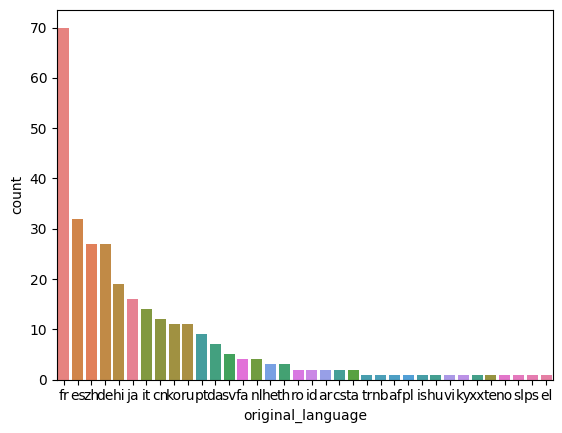

In [ ]:
#passando pro ordem
sns.countplot(data=tmdb.query('original_language != "en"'),
              order = total_de_outras_linguas.index,
              hue= 'original_language',
              x='original_language')

Text(0.5, 1.0, 'Quantidade de filmes por língua exceto em ingles')

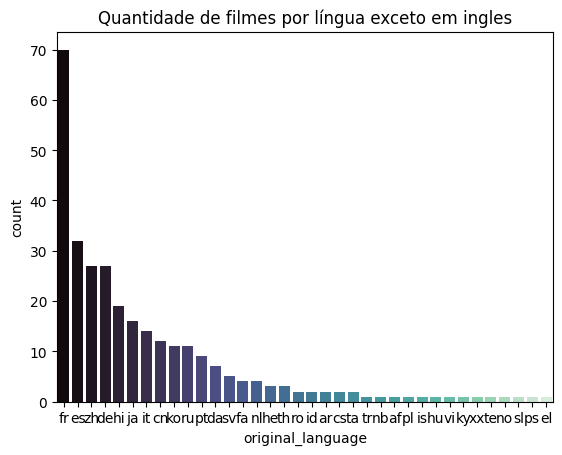

In [ ]:
sns.countplot(data=tmdb.query('original_language != "en"'),
              order = total_de_outras_linguas.index,
              hue= 'original_language',
              hue_order = total_de_outras_linguas.index,
              palette = 'mako',
              x='original_language')
plt.title('Quantidade de filmes por língua exceto em ingles')

In [ ]:
tmdb.query('original_language != "en"')['original_language'].value_counts(normalize=True)


,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758
ja,0.053691
it,0.046980
cn,0.040268
ko,0.036913


Text(0.5, 1.0, 'Quantidade de filmes por língua exceto em ingles')

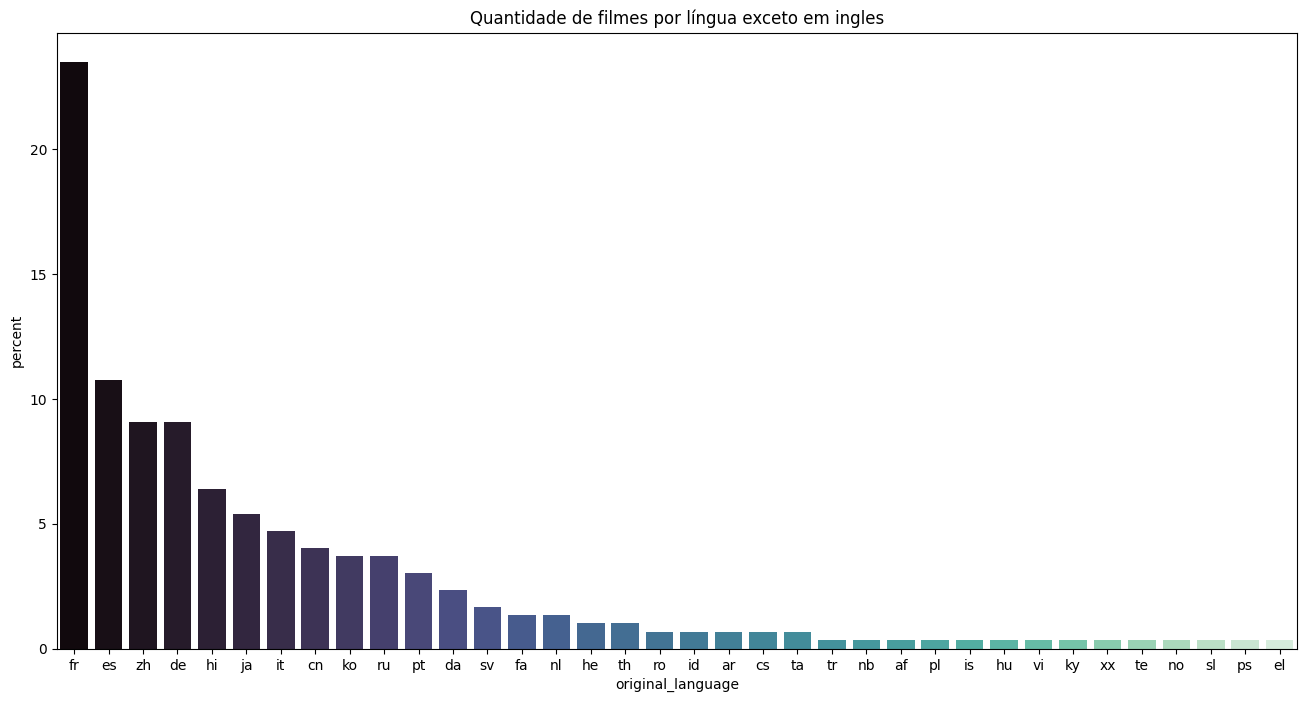

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=tmdb.query('original_language != "en"'),
              order = total_de_outras_linguas.index,
              hue= 'original_language',
              hue_order = total_de_outras_linguas.index,
              palette = 'mako',
              stat= 'percent',
              x='original_language')
plt.title('Quantidade de filmes por língua exceto em ingles')

# Aula 6 - Estatística dos Dados

In [ ]:
# vendo as nomes de filmes especificos
filmes.head(2)

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
# Pegando a nota de filmes específicos

notas_filme1 = notas.query('filmeID==1')['nota']
notas_filmes2 = notas.query('filmeID==2')['nota']

media_filme1 = notas_filme1.mean()
media_filme2 = notas_filmes2.mean()

print(media_filme1, media_filme2)



3.9209302325581397 3.4318181818181817


In [ ]:
mediana_filme1 = notas_filme1.median()
mediana_filme2 = notas_filmes2.median()

print(mediana_filme1, mediana_filme2)

4.0 3.5


In [ ]:
#Mesmo tendo a mesma media e mediana, podem ter distrbuicoes diferentes
# Exemplo do caso dataframe com 10 notas 5 e 10 notas 1 mesma media e mediana de 10 notas 2,5 e 10 notas 3,5
# Pra saber sobre esse desvio da média, falamos de desvio padrão

{'whiskers': [<matplotlib.lines.Line2D at 0x7ecd6be66e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ecd6be673d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ecd6be66bf0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ecd6be67910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ecd6be67bb0>,
 'means': []}

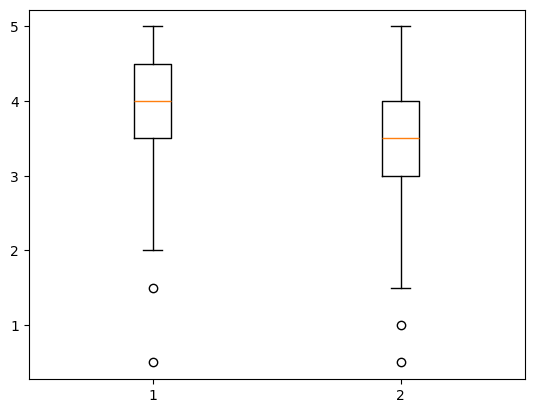

In [ ]:
# Visualizar a distribuicao das notas de Toy Story e Jumanji
plt.boxplot([notas_filme1, notas_filmes2])

<Axes: xlabel='filmeID', ylabel='nota'>

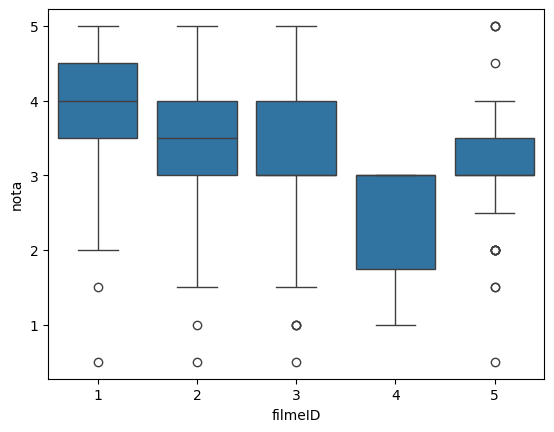

In [ ]:
# Usando o searborn para um grafico melhor
sns.boxplot(data=notas.query('filmeID < 6'),
            x='filmeID',
            y='nota')

<ipython-input-50-e809fad5c9d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query('filmeID < 6'),


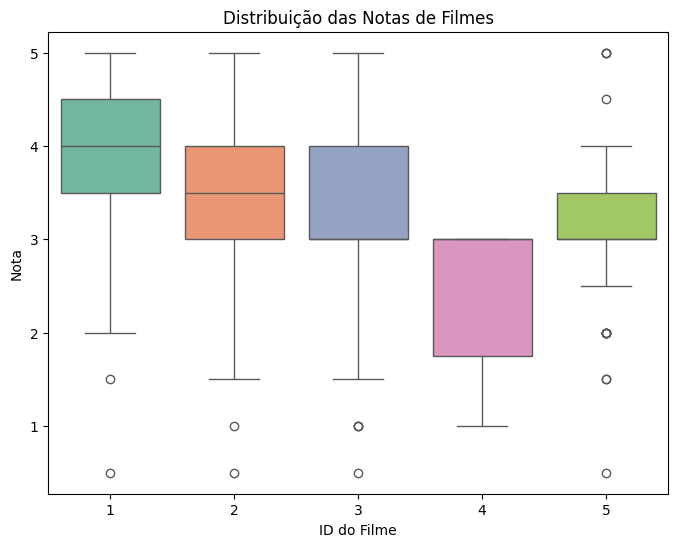

In [ ]:
# Usando o seaborn para um gráfico melhor com cores
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.boxplot(data=notas.query('filmeID < 6'),
            x='filmeID',
            y='nota',
            palette='Set2')  # Usa a paleta de cores 'Set3'
plt.title('Distribuição das Notas de Filmes') # Adiciona um título ao gráfico
plt.xlabel('ID do Filme')  # Adiciona um rótulo ao eixo x
plt.ylabel('Nota')  # Adiciona um rótulo ao eixo y
plt.show()

In [ ]:
notas.groupby("filmeID").count()

,usuarioID,nota,momento
filmeID,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [ ]:
# Muitos filmes tem só 1 nota e podem estragar as media
notas.groupby("filmeID").count().query('nota==1')

,usuarioID,nota,momento
filmeID,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
